# **ENGINE HEALTH PREDICTION**

## **Problem Statement**

In order to maintain optimal engine performance, prevent potential engine failures, and enhance overall efficiency.Additionally, a key aspect of engine optimization involves reducing the environmental impact associated with emissions.

By prioritizing the prevention of engine failures, improving performance, and minimizing the environmental impact of emissions, we can achieve a harmonious balance between efficient operations, sustainable practices, and environmental supervision

Develop machine learning model to accurately predict the health status of engines based on the real-time analysis of multiple engine parameters, including

❄ Engine RPM

❄ Lubricating Oil Pressure

❄ Fuel Pressure

❄ Coolant Pressure

 ❄ Lubricating Oil Temperature

❄ Coolant Temperature.



## **Data Definition:**

*   📰 **Engine rpm :**  RPM stands for "Revolutions Per Minute" and refers to the rotational speed of engine (Numeric Variable).

*   📰 **Lub oil pressure :** It refers to pressure exerted by the lubricating oil within an engine's lubrication system  (Numeric Variable,Measured in Pounds per square inch (PSI)).

*    📰 **Fuel pressure :** It represents the force at which the fuel is delivered to the engine's combustion chambers (Numeric Variable,Measured in Pounds per square inch (PSI)).

*  📰 **Coolant pressure :** It represents the force at which the coolant circulates through the system, helping to regulate and maintain the engine's optimal operating temperature (Numeric Variable,Measured in Pounds per square inch (PSI)).

*  📰 **Lub oil temp :**  It refers to the temperature of the engine's lubricating oil within the lubrication system (Numeric Variable,Measured in Degrees Fahrenheit (°F)).

*  📰 **Coolant temp :** It refers to the temperature of the coolant within the cooling system of an engine (Numeric Variable,Measured in Degrees Fahrenheit (°F)).

*  📰 **Engine Condition :** It referes to condition of the engine Healthy Engine or UnHealthy Engine. it varies based on  Engine RPM , Lubricating Oil Pressure,
Fuel Pressure,
Coolant Pressure,
Lubricating Oil Temperature,
Coolant Temperature (Target Variable : Un-Healthy Engine = 0 and  Healthy Engine = 1 ).





## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
# By importing these libraries, It will have access to a wide range of functions and tools for data manipulation, analysis, and visualization, classification reports of model.

## **Loading the Data**

In [ ]:
# upload files in Google Colab  from your local machine

from google.colab import files
uploaded=files.upload()

Saving engine_data.csv to engine_data.csv


In [ ]:
# read the CSV file and store its contents in the DataFrame (df).

df=pd.read_csv("engine_data.csv")


In [ ]:
# it shows the first 5 records in DataFrame

df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0

In [ ]:
# retrieve the dimensions of a DataFrame

df.shape

(19535, 7)

 DataFrame containing 19535 rows and 7 columns

In [ ]:
# getting  a short information about the number of non-null values, data types of each column, and memory usage of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In the DataFrame, there are 19535 non-null values for all fields.

The fields "Engine RPM" and "Engine Condition" have integer data types, while the other fields are of float data type.

## **EDA (Exploratory Data Analysis)**

Identifying the data types of each column, Detecting and handling missing values if any, Analyzing the distribution of values in each column, Visualizing the relationship between  variables

In [ ]:
#  used to generate descriptive statistics for each column

df.describe(include="all")

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0.000000  
50%       76.817350     78.346662          1.000000  
75%       78.071691     82.915411          1.000000  
max       89.580796    195.527912          1.000000

In [ ]:
# check for missing values in each column

df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

The DataFrame has no missing values in any of its columns.

In [ ]:
# identify duplicate rows and calculate the number of duplicate rowsin DataFrame

df.duplicated().sum()

0

The DataFrame contains only unique records; there are no duplicated rows.






# **Feature Extraction**

Feature extraction, It involves selecting or extracting relevant characteristics or properties from the data that are expected to be most predictive or relevant for the task at hand.


In [ ]:
# to calculate the engine load by relating  the engine rpm  with the Lub oil pressure and Fuel pressure

df['Engine Load'] = (df['Engine rpm'] + 2 * df['Lub oil pressure'] + df['Fuel pressure']) / 4


Engine load refers to the measurement of the amount of load on an engine how heavily the engine is being utilized relative to its maximum capacity.

A high value for this feature indicates that the engine is under a lot of load.

In [ ]:
# to calculate the engine stress by relating the  engine rpm with the Lub oil pressure and Fuel pressure
df["Engine Stress"] = (df["Engine rpm"] + df["Lub oil pressure"] + df["Fuel pressure"]) / 3


Engine stress refers to the level of stress experienced by an engine during its operation.

A high value for this feature indicates that the engine is under a lot of stress.

In [ ]:
# to calculate the engine temperature  by relating the  lub oil temp and coolant temp

df["Engine Temperature"] = (df["lub oil temp"] + df["Coolant temp"]) / 2


Engine temperature refers to the measurement of the heat produced by an engine during its operation.

A high value for this feature indicates that the engine is running too hot.

In [ ]:
#  to calculate the engine wear  differencing the Lub oil pressure with Coolant pressure

df["Engine Wear"] = df["Lub oil pressure"] - df["Coolant pressure"]

Engine wear refers to the gradual deterioration and loss of material from engine components during operation.

A positive high value for this feature indicates that the engine is wearing down

In [ ]:
#  to calculate the engine pressure multiplying engine rpm, lub oil pressure and fuel pressure each other

df["Engine Pressure"] = (df["Engine rpm"] * df["Lub oil pressure"] * df["Fuel pressure"]) / 1000

Engine pressure refers to the force exerted on the engine's components due to the compression and combustion of fuel and air within the engine's cylinders.

 A high value for this feature indicates that the engine is under a lot of pressure.

In [ ]:
# to calculate the engine efficiency by relating the engine rpm  to the Lub oil pressure.

df['Engine Efficiency'] = df['Engine rpm'] / df['Lub oil pressure']


Engine efficiency refers to the ratio of useful work output to the energy input in an engine.

A high value for this feature indicates that the engine is running efficiently.

After extracting the relevant and important features to handle the dataset for predicting the Engine Condition, we are adding the following features to the DataFrame:

❄ Engine Load

❄Engine Stress

❄ Engine Temperature

❄Engine Wear

❄Engine Pressure

❄Engine Efficiency.

These features will be incorporated into the DataFrame for further analysis and modeling tasks related to predicting the Engine Condition.

In [ ]:
# After adding extracted feature to DataFrame, Reviewing the feature

df.head()
# it shows the first 5 records in DataFrame


Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  Engine Load  Engine Stress  \
0     84.144163     81.632187                 1   179.194528     238.094840   
1     77.640934     82.445724                 0   224.519269     298.378490   
2     77.752266     79.645777                 1   133.119160     176.504964   
3     74.129907     71.774629                 1   124.981460     165.406002   
4     78.396989     87.000225                 0   161.521177     213.470597   

   Engine Temperature  Engine Wear  Engine Pressure  Engine Efficiency  
0           82.888175    -0.685389        20.581232         280.719560  
1           80.043329     0.477102        41.729111         297.796517  
2           78.699021     1.897399        10.092552         175.572137  
3           72.952268    -0.019621        34.217053         127.567713  
4           82.698607     3.620667        55.267623         109.114910

In [ ]:
# Also checking for dimension of DataFrame after adding extracted feature

df.shape


(19535, 13)

# **Data Visualization**

Data visualization is the process of representing data in a visual format, such as a chart, graph, or map. It is a powerful tool that can be used to communicate complex information in a way that is easy to understand.

Visualize all the fields in the dataframe by using a various of charts, plots, and maps, while examining their relationship with the target variable and identifying factors that impact engine health.

## **Univariate Analysis**

Univariate analysis is  used to examine the relationship between a single variable and its distribution or characteristics. It focuses on analyzing and summarizing the characteristics and patterns of a single variable without considering the relationship with other variable



Text(0.5, 1.0, 'Histograms of  All Columns')

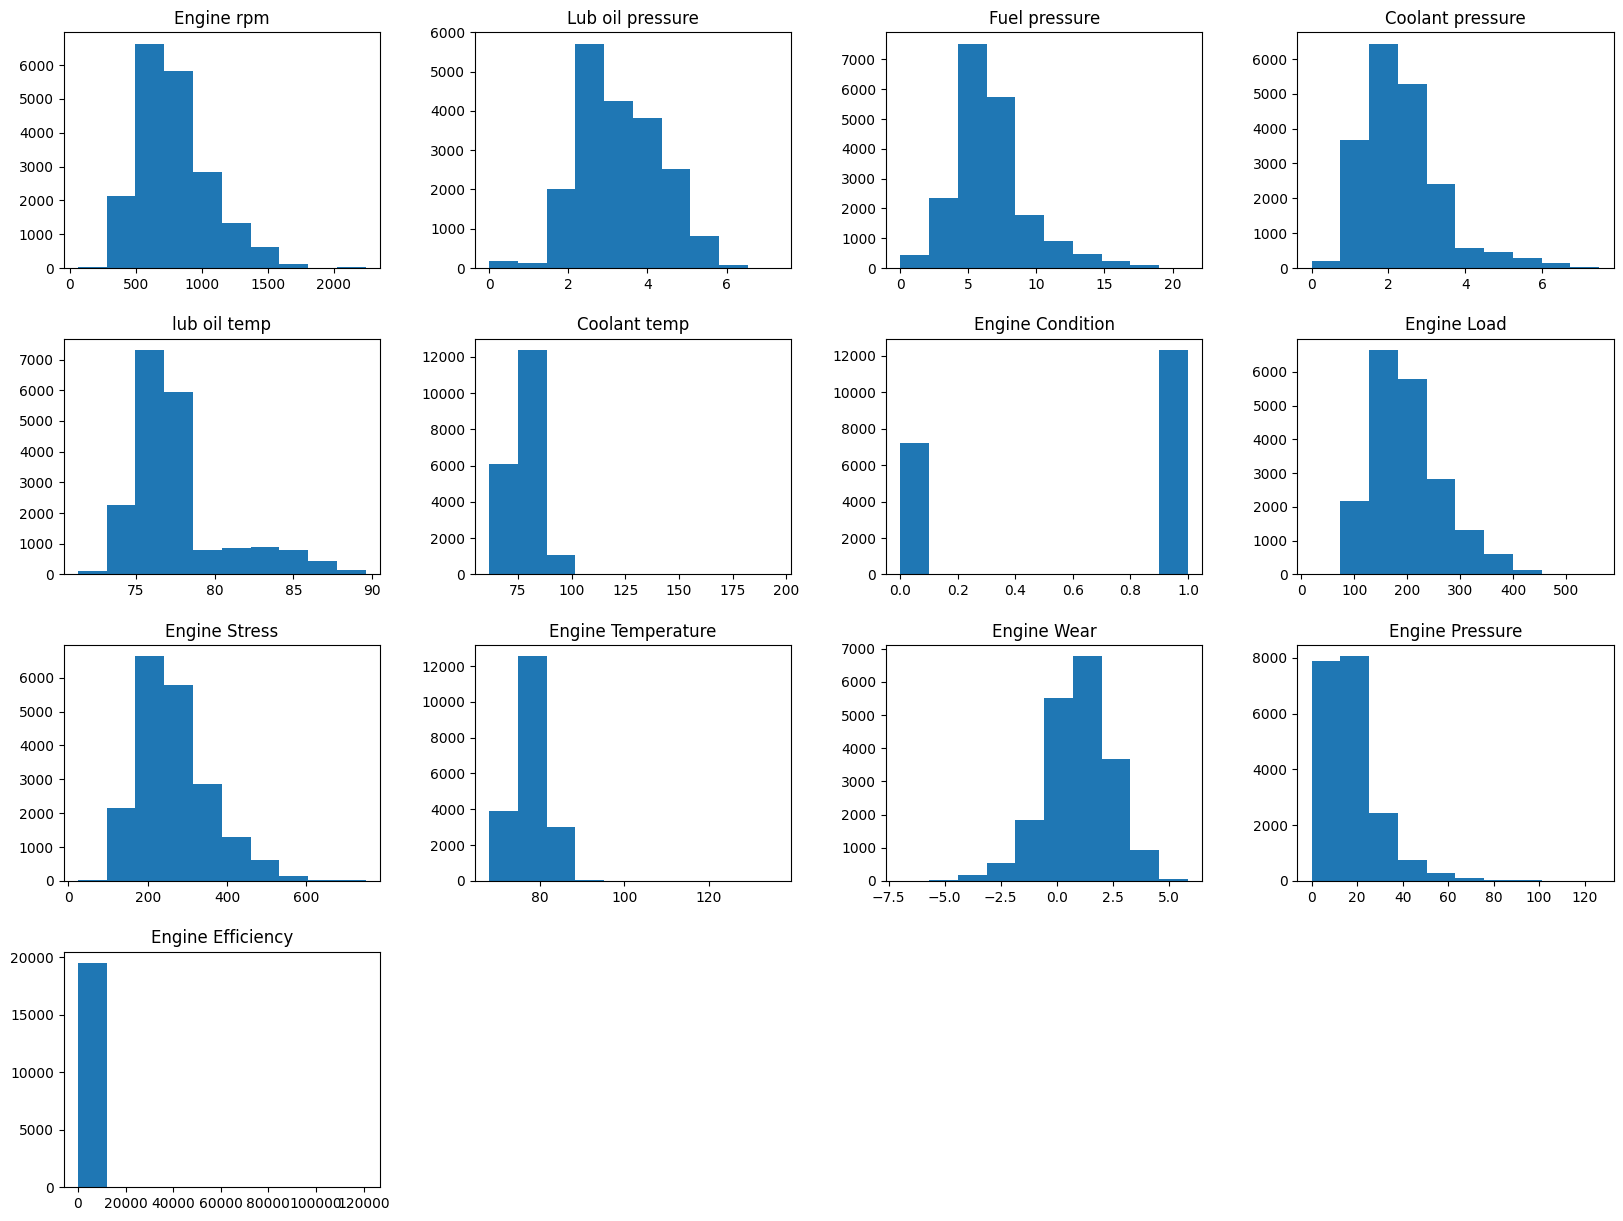

In [ ]:
df.hist(figsize=(20,15), grid=False)
plt.title('Histograms of  All Columns')

## **Bivariate analysis**

Bivariate analysis is used to examine the relationship between two variables. It focuses on studying the association, correlation, or comparison between two variables to understand how changes in one variable are related to changes in the other variable. Bivariate analysis helps identify patterns, correlations, and dependencies between predictor variables and the target variable.



1.Visualize the relationship between Engine RPM and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine rpm'>

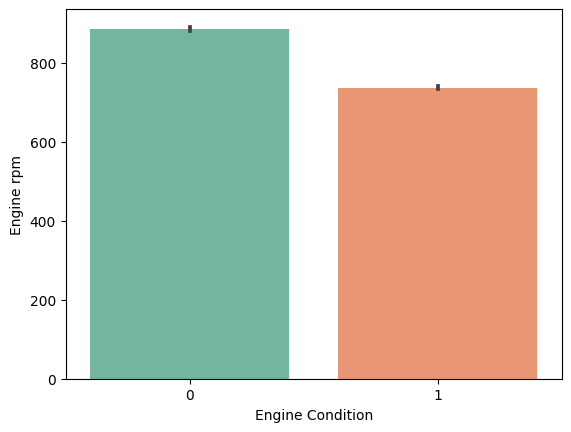

In [ ]:
sns.barplot(x="Engine Condition", y="Engine rpm", data=df,palette="Set2")


2.Visualize the relationship between Lubrication oil pressure and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Lub oil pressure'>

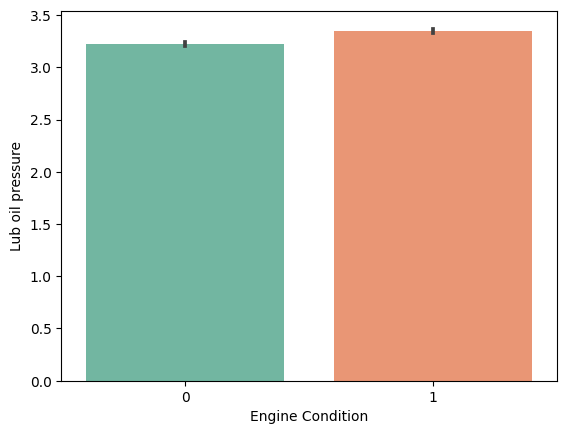

In [ ]:
sns.barplot(x="Engine Condition", y="Lub oil pressure", data=df,palette="Set2")


3.Visualize the relationship between Fuel pressure and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Fuel pressure'>

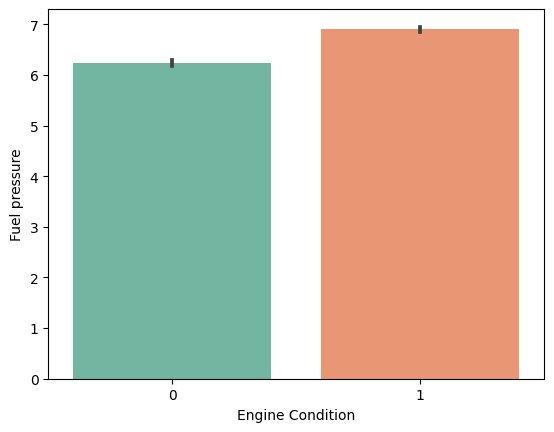

In [ ]:
sns.barplot(x="Engine Condition", y="Fuel pressure", data=df,palette="Set2")


4.Visualize the relationship between Coolant pressure and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Coolant pressure'>

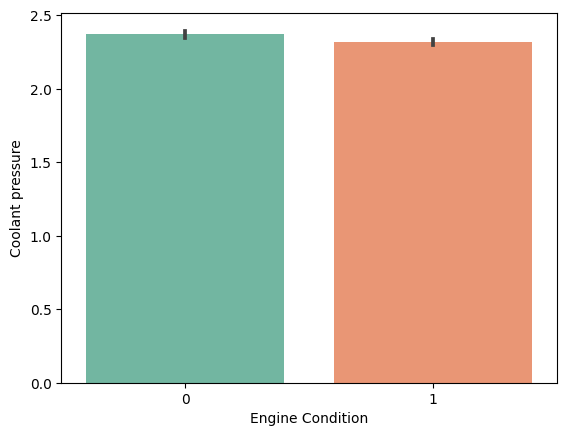

In [ ]:
sns.barplot(x="Engine Condition", y="Coolant pressure", data=df,palette="Set2")

5.Visualize the relationship between lubrication oil temprature and Engine Health

<Axes: xlabel='Engine Condition', ylabel='lub oil temp'>

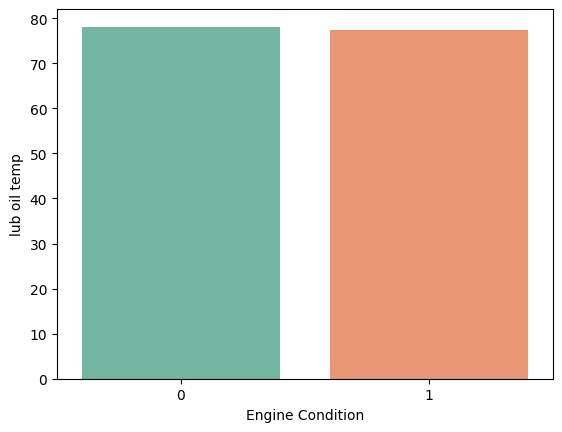

In [ ]:
sns.barplot(x="Engine Condition", y="lub oil temp", data=df,palette="Set2")


6.Visualize the relationship between Coolant temprature and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Coolant temp'>

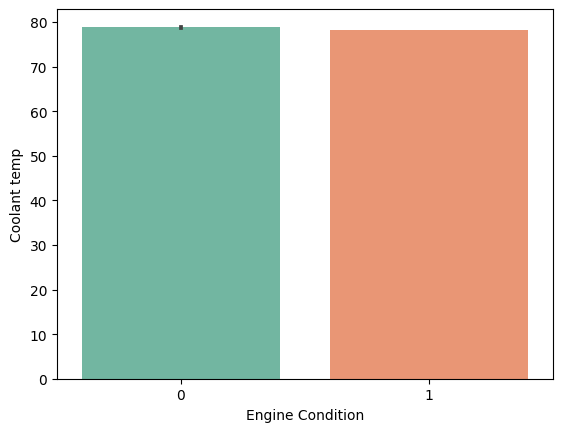

In [ ]:
sns.barplot(x="Engine Condition", y="Coolant temp", data=df,palette="Set2")


7.Visualize the relationship between Engine Load and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Load'>

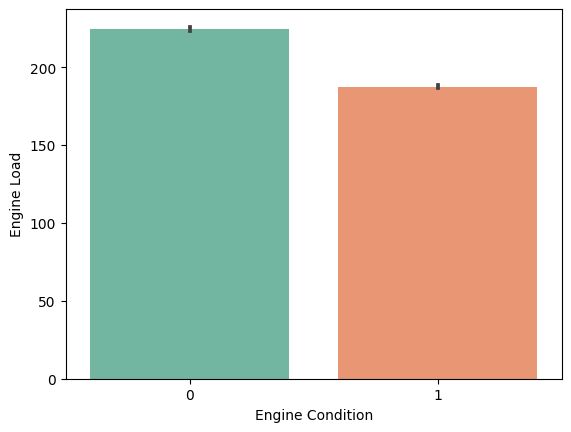

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Load", data=df,palette="Set2")


8.Visualize the relationship between Engine Stress	and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Stress'>

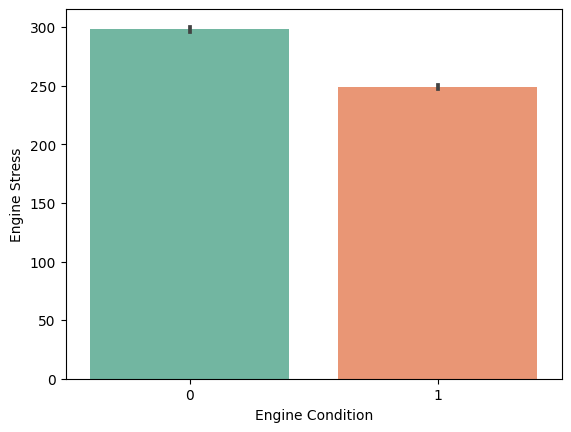

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Stress", data=df,palette="Set2")


9.Visualize the relationship between Engine Temperature and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Temperature'>

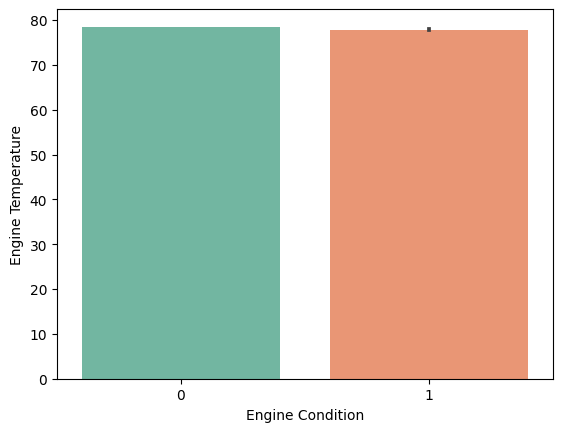

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Temperature", data=df,palette="Set2")


10.Visualize the relationship between Engine Wear and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Wear'>

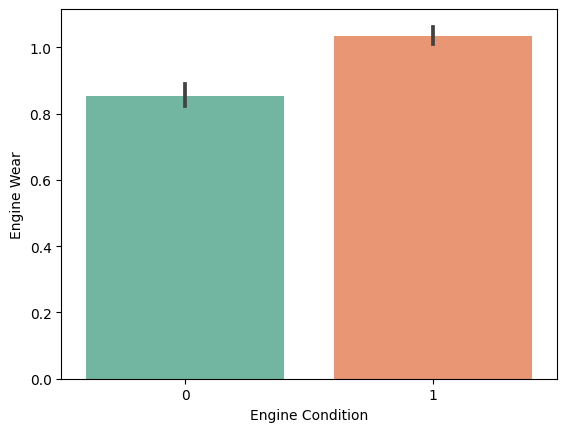

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Wear", data=df,palette="Set2")


11.Visualize the relationship between Engine Pressure and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Pressure'>

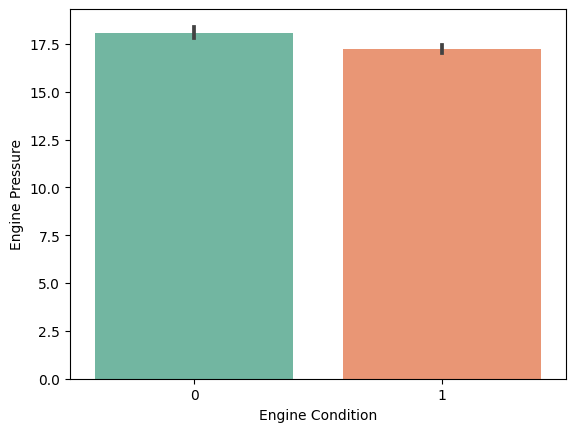

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Pressure", data=df,palette="Set2")


12.Visualize the relationship between Engine Efficiency and Engine Health

<Axes: xlabel='Engine Condition', ylabel='Engine Efficiency'>

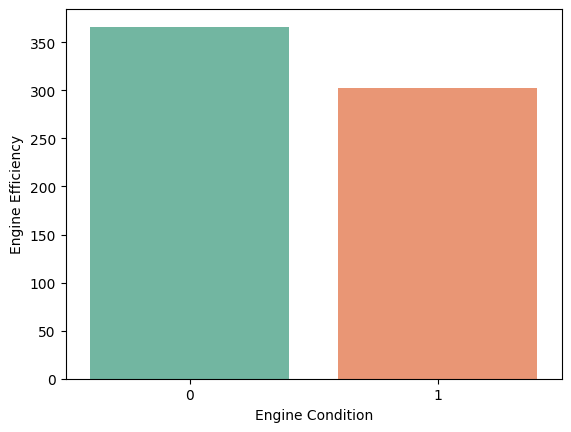

In [ ]:
sns.barplot(x="Engine Condition", y="Engine Efficiency", data=df,palette="Set2",ci=None)


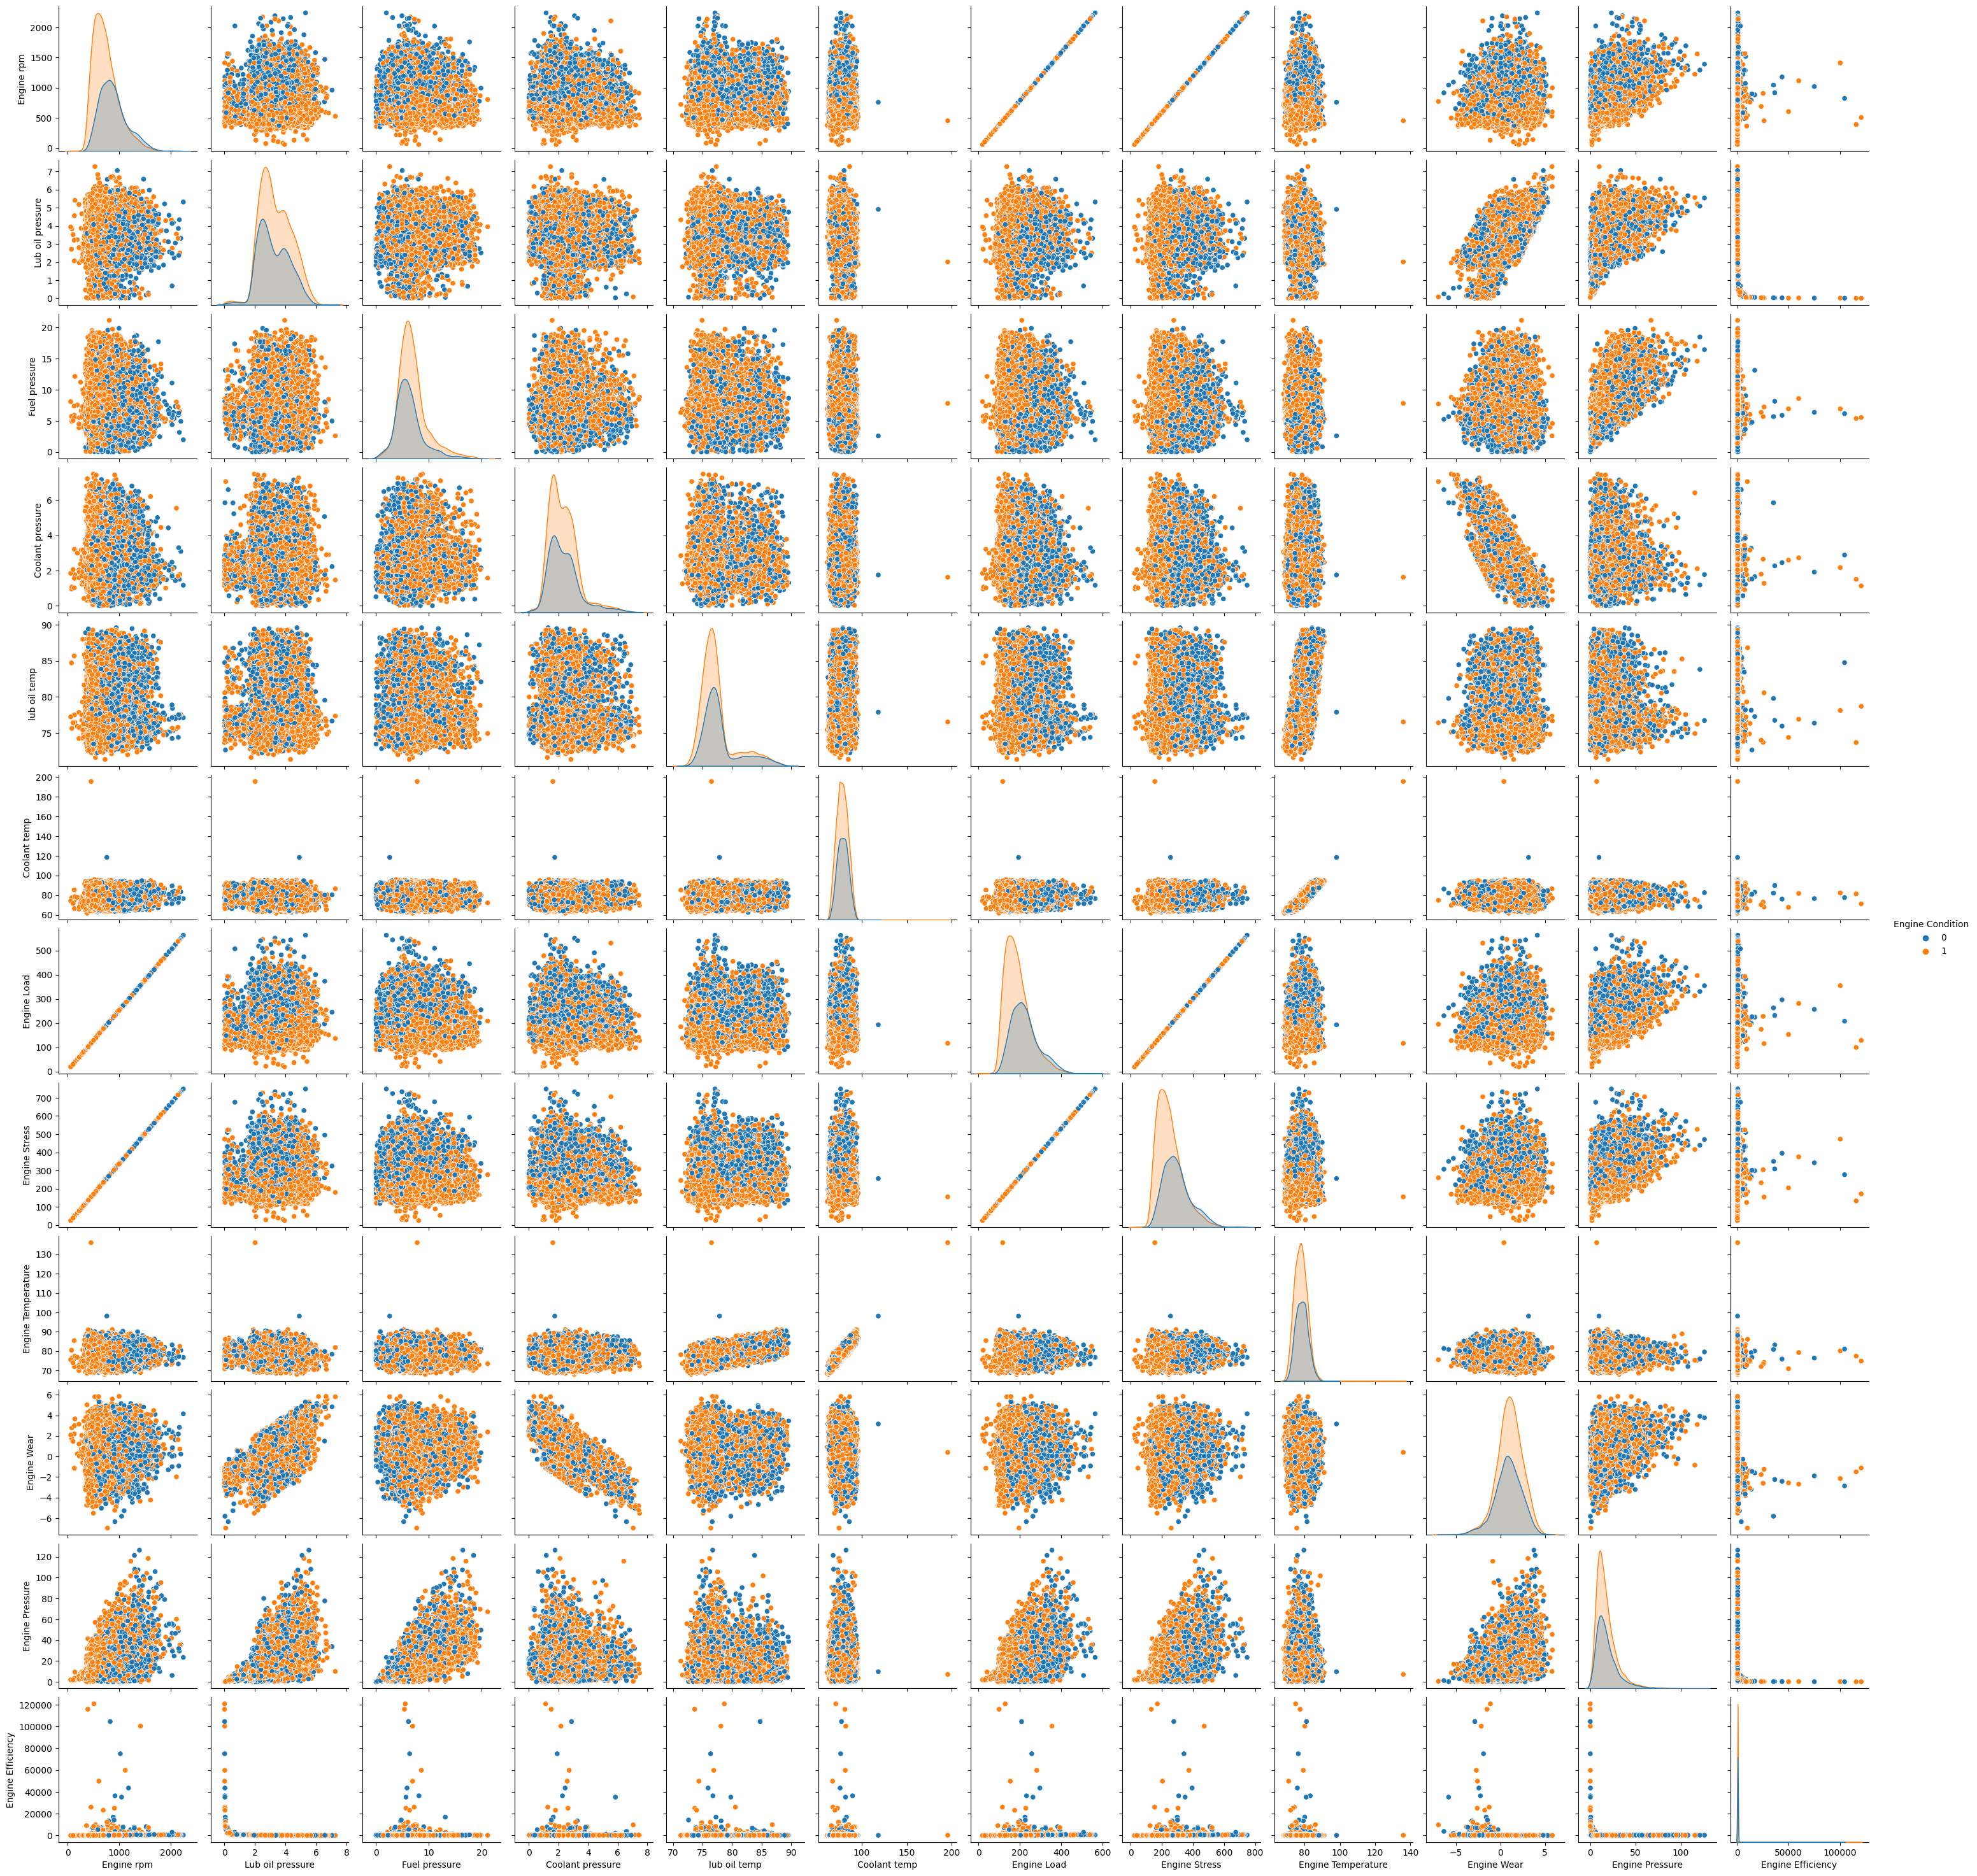

In [ ]:
sns.pairplot(data=df,hue="Engine Condition")

## **Multivariate Analysis**

Multivariate analysis refers to the analysis of multiple variables simultaneously to understand the relationships, patterns, and interactions among them. It involves examining how multiple independent variables collectively influence a dependent variable in a dataset.

In [ ]:
correlation = df.corr()

<Axes: >

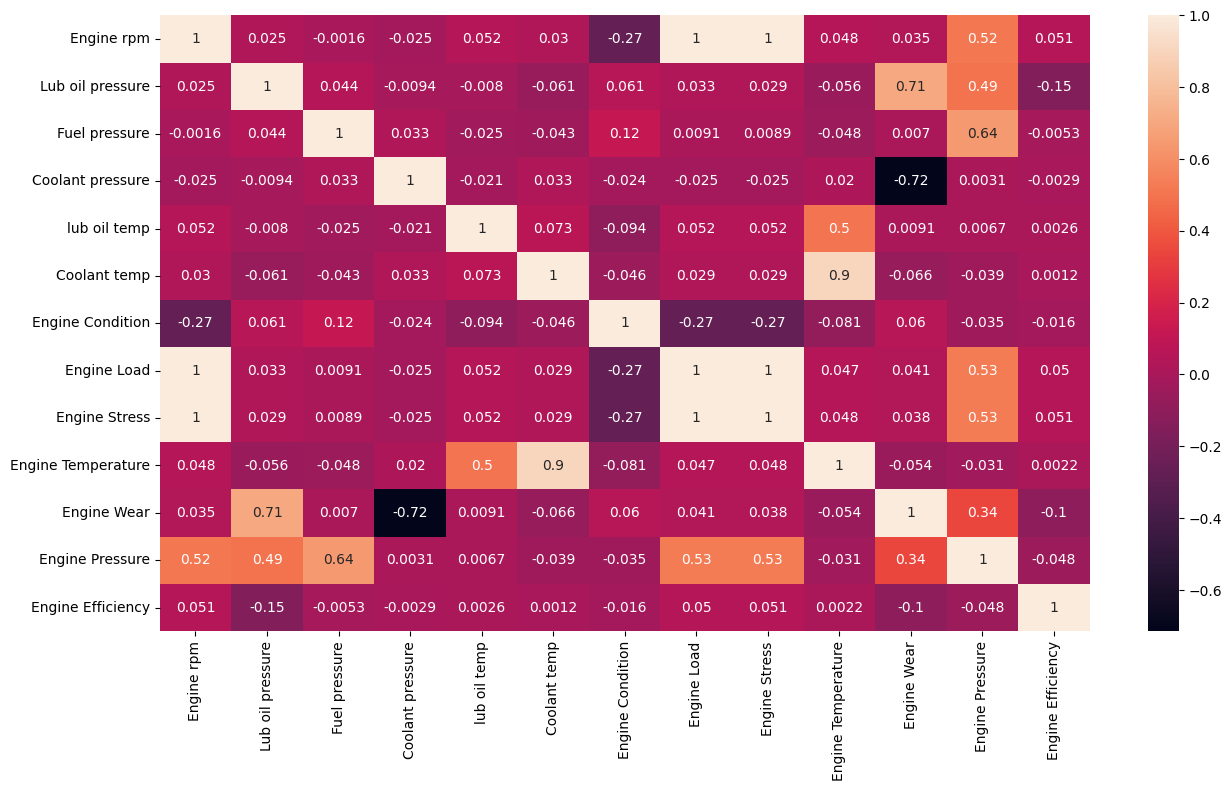

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,annot=True)

In [ ]:
df.corr()['Engine Condition']

Engine rpm           -0.268201
Lub oil pressure      0.060904
Fuel pressure         0.116259
Coolant pressure     -0.024054
lub oil temp         -0.093635
Coolant temp         -0.046326
Engine Condition      1.000000
Engine Load          -0.266467
Engine Stress        -0.266731
Engine Temperature   -0.081039
Engine Wear           0.059608
Engine Pressure      -0.035398
Engine Efficiency    -0.016410
Name: Engine Condition, dtype: float64

The correlation values between "Engine Condition" and other columns indicate the strength and direction of the linear relationship between the variables. Here's how you can interpret the correlation values:

"Engine rpm": The correlation value of -0.268201 suggests a moderate negative correlation between engine rpm and engine condition. This means that as the engine rpm increases, the engine condition tends to decrease, and vice versa.

"Lub oil pressure": The correlation value of 0.060904 indicates a weak positive correlation between lub oil pressure and engine condition. It suggests that there is a slight tendency for higher lub oil pressure to be associated with better engine condition.

"Fuel pressure": The correlation value of 0.116259 suggests a weak positive correlation between fuel pressure and engine condition. It implies that higher fuel pressure may be associated with better engine condition, although the correlation is not very strong.

"Coolant pressure": The correlation value of -0.024054 indicates a weak negative correlation between coolant pressure and engine condition. It suggests that higher coolant pressure may be associated with slightly lower engine condition.

"Lub oil temp": The correlation value of -0.093635 suggests a weak negative correlation between lub oil temp and engine condition. This means that higher lub oil temperature may be associated with slightly lower engine condition.

"Coolant temp": The correlation value of -0.046326 indicates a weak negative correlation between coolant temp and engine condition. It suggests that higher coolant temperature may be associated with slightly lower engine condition.

"Engine Load": The correlation value of -0.266467 suggests a moderate negative correlation between engine load and engine condition. It means that higher engine load is associated with lower engine condition.

"Engine Stress": The correlation value of -0.266731 indicates a moderate negative correlation between engine stress and engine condition. It implies that higher engine stress tends to be associated with lower engine condition.

"Engine Temperature": The correlation value of -0.081039 suggests a weak negative correlation between engine temperature and engine condition. It means that higher engine temperature may be associated with slightly lower engine condition.

"Engine Wear": The correlation value of 0.059608 indicates a weak positive correlation between engine wear and engine condition. It suggests that higher engine wear may be associated with better engine condition, although the correlation is not very strong.

"Engine Pressure": The correlation value of -0.035398 indicates a weak negative correlation between engine pressure and engine condition. It suggests that higher engine pressure may be associated with slightly lower engine condition.

"Engine Efficiency": The correlation value of -0.016410 suggests a very weak negative correlation between engine efficiency and engine condition. It means that engine efficiency has almost no linear relationship with engine condition.

## **Checking For Outlier**

Outliers are data points that significantly deviate from the majority of the data.. Handling outliers is important in data analysis and machine learning as they can adversely impact the performance and results of models.

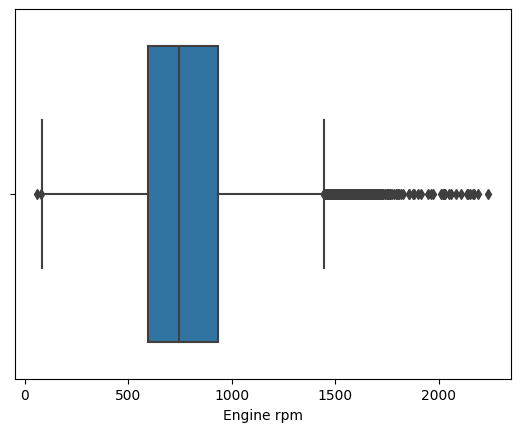

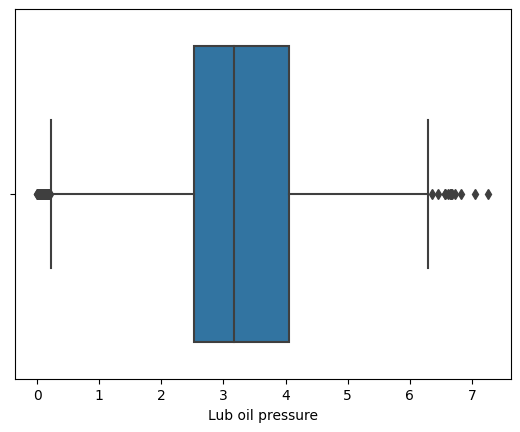

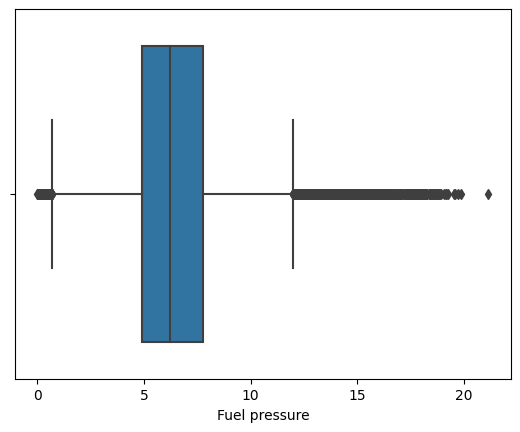

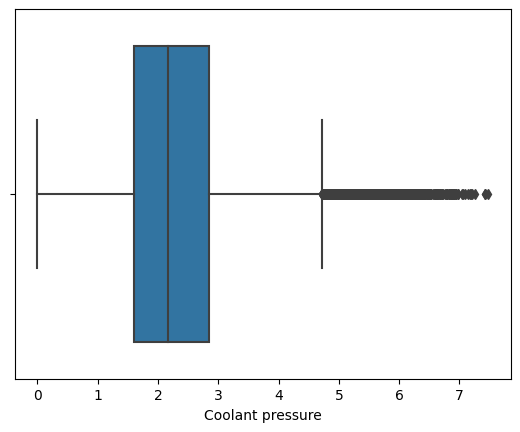

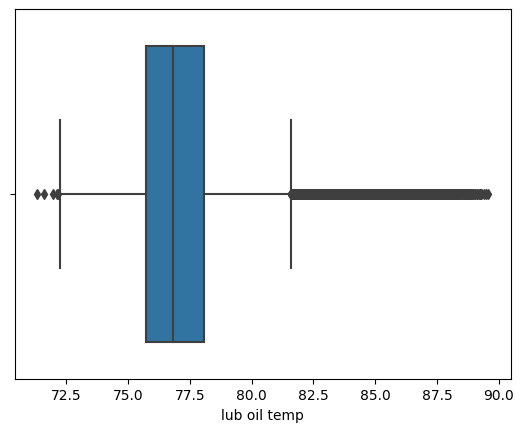

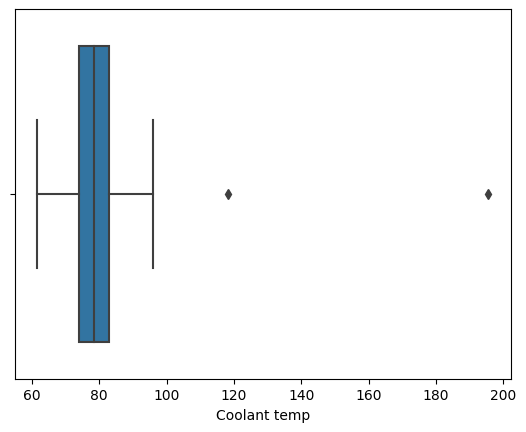

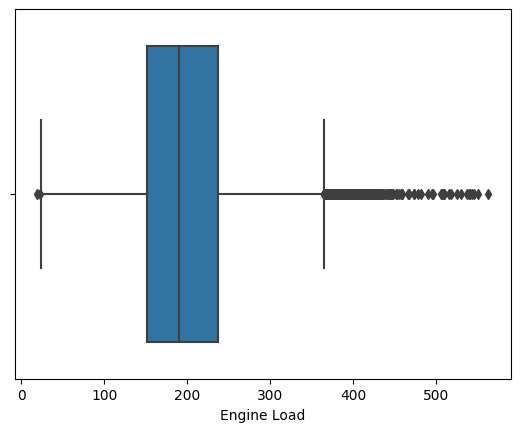

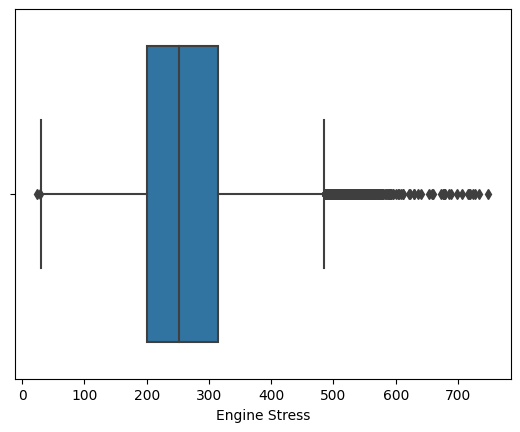

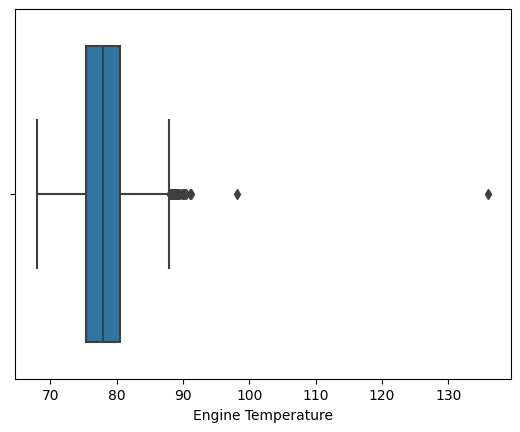

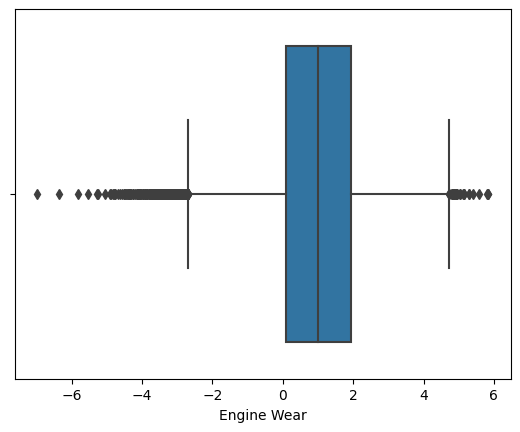

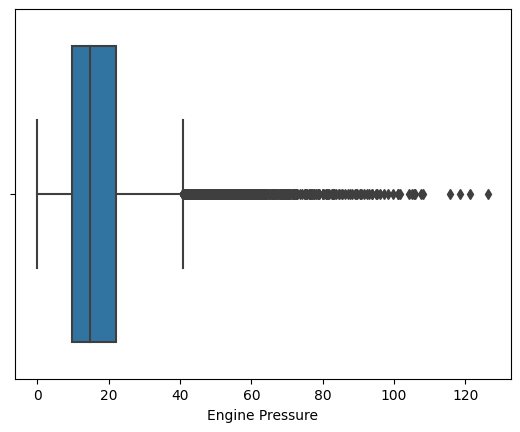

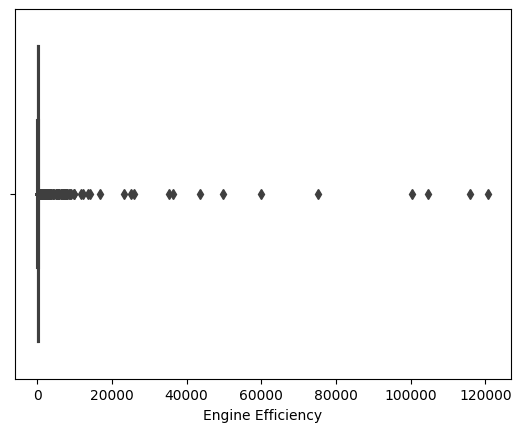

In [ ]:
# Defining column names
column_names= ["Engine rpm",	"Lub oil pressure",	"Fuel pressure",	"Coolant pressure",	"lub oil temp",	"Coolant temp",
       'Engine Load',	'Engine Stress',	'Engine Temperature',	'Engine Wear',	'Engine Pressure',	'Engine Efficiency']

# Creating boxplots by loop to iterate over each column name
for col in column_names:
    sns.boxplot(x=col, data=df)
    plt.show()


After analyzing the boxplots for all fields in our DataFrame, we have identified the presence of outliers. It is crucial to address these outliers before proceeding with the machine learning model. Treating the outliers is necessary to ensure that they do not adversely affect the performance and results of the model.

## **Treating Outlier**

In [ ]:
#  Defining a function to remove outlier

def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1 # Calculating IQR
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [ ]:
# Treating all the outliers at once by loop to iterate over each column name

for col in  column_names:
    lr, ur = remove_outliers(df[col])
    df[col] = np.where(df[col] > ur, ur, df[col])
    df[col] = np.where(df[col] < lr, lr, df[col])

After treating outliers  checking for presence of outlier




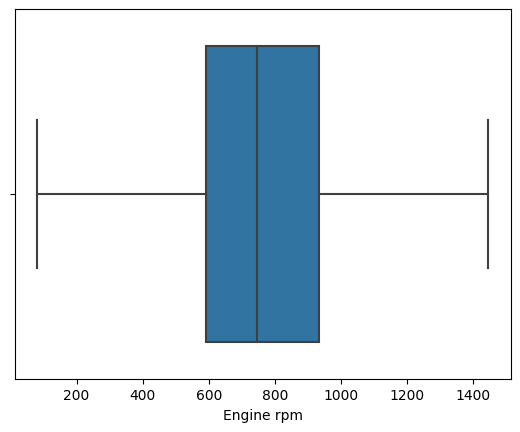

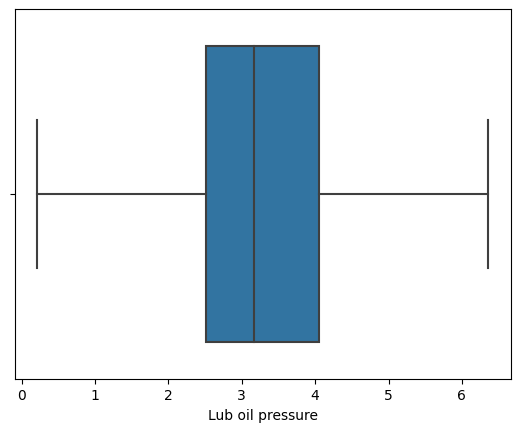

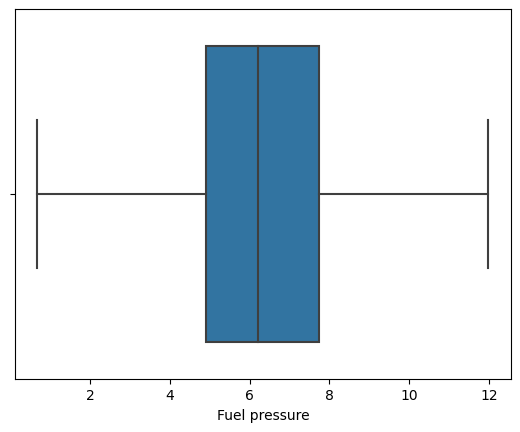

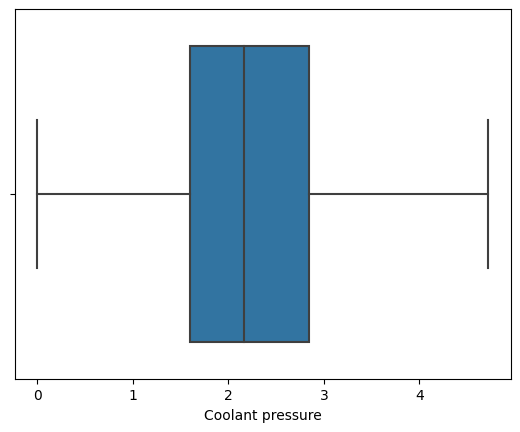

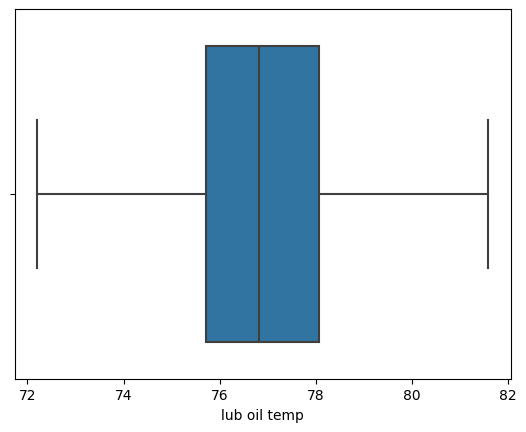

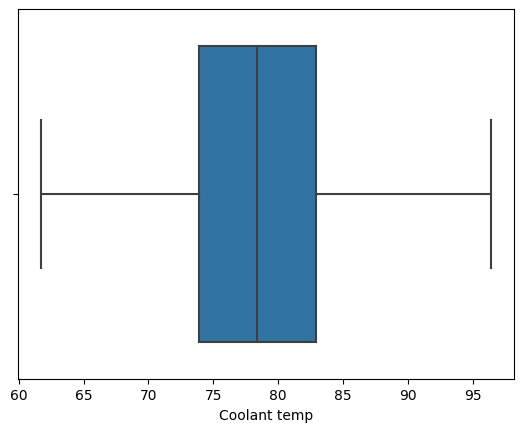

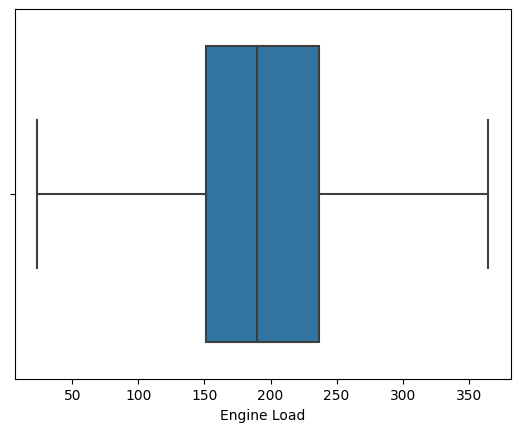

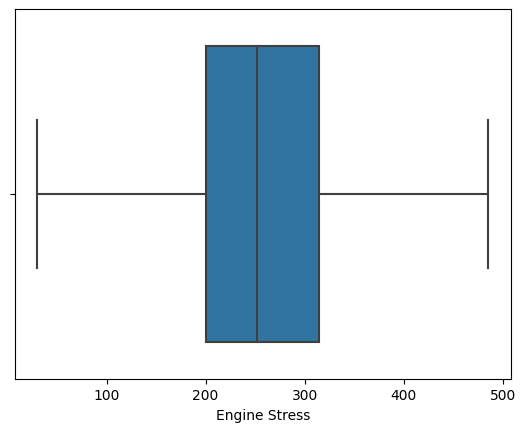

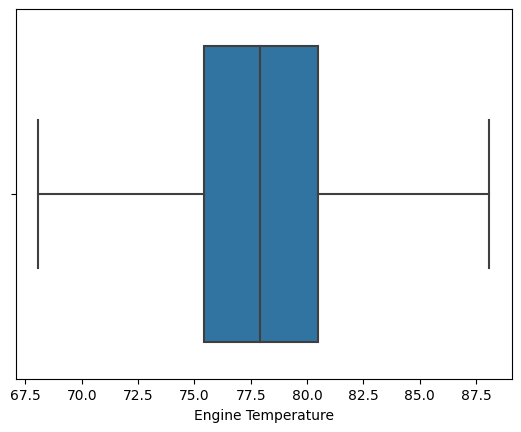

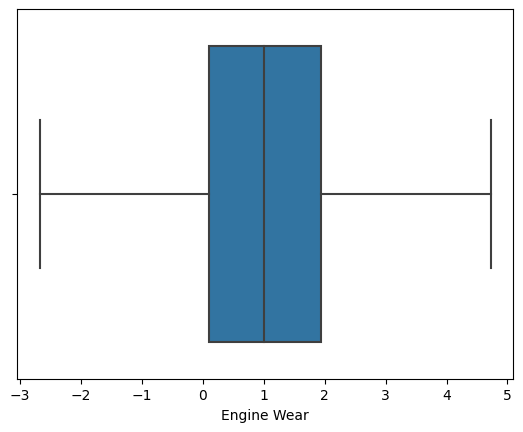

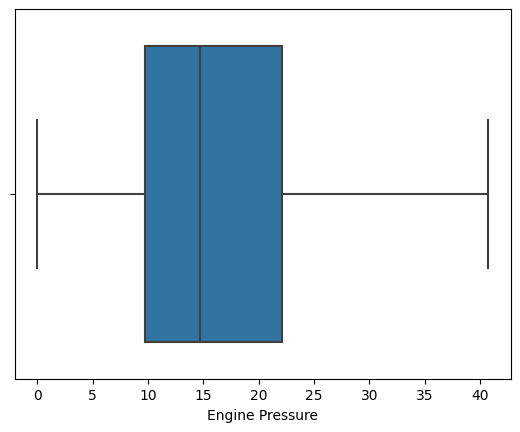

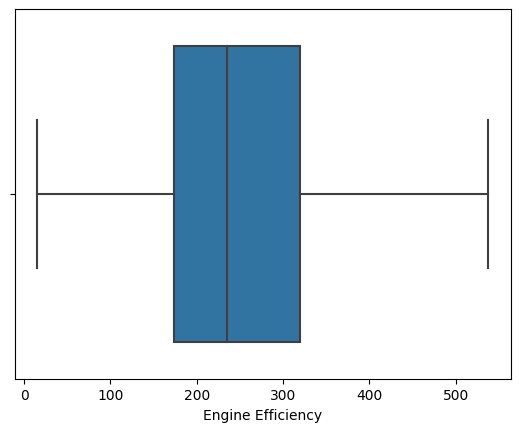

In [ ]:
# Creating boxplots by loop to iterate over each column name

for col in column_names:
    sns.boxplot(x=col, data=df)
    plt.show()


After treating outliers in our DataFrame, where no outliers are present, the overall quality and accuracy of the dataset are enhanced. This improvement allows us to proceed with a machine learning model for predicting the target variable with increased accuracy.

## **Class Balancing**

Class balancing is important in machine learning when dealing with imbalanced datasets. To improve Accuracy and Performance, Preventing Information Loss, Improved Generalization,Better Evaluation Metrics.

1    12317
0     7218
Name: Engine Condition, dtype: int64


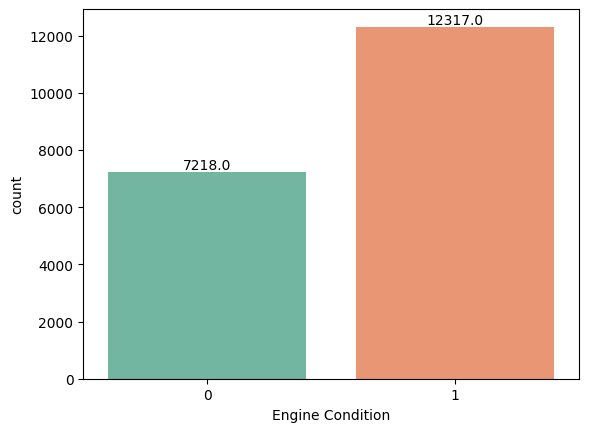

In [ ]:

# Get the number of data points in each class

class_counts = df["Engine Condition"].value_counts()

# Print the class counts

print(class_counts)

sns.countplot(x="Engine Condition", data=df,palette="Set2")

# Add annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

plt.show()



 It represent the class distribution of a binary target variable  "Engine Condition." has the value "1" has a count of 12,317 instances, while the value "0" has a count of 7,218 instances.

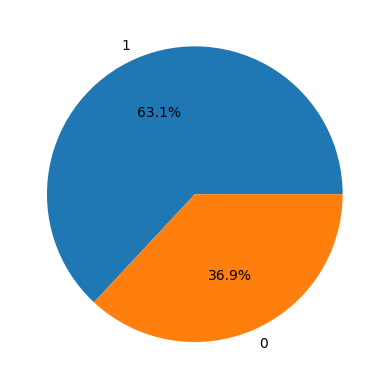

In [ ]:
 # using the matplotlib library to create a pie chart based on the class distribution of the "Engine Condition"
plt.pie(df['Engine Condition'].value_counts(),labels=df['Engine Condition'].value_counts().index,autopct='%1.1f%%');

The pie chart illustrates the distribution of the "Engine Condition" target variable. It reveals that the class labeled as "1" constitutes 63.1% of the dataset, while the other class, labeled as "0", accounts for 36.9% of the dataset.

 For addressing class imbalance in machine learning datasets **"SMOTE"** (Synthetic Minority Over-sampling Technique) class from the imblearn.over_sampling module is used. SMOTE, can effectively increase the number of minority class samples in dataset would contain the oversampled dataset with a balanced class distribution.

In [ ]:
# Importing the SMOTE class from the imblearn.over_sampling
from imblearn.over_sampling import SMOTE

#  loaded  dataset into variables x and y
x=df.drop(['Engine Condition'],axis=1)  # Feature variables
y=df[['Engine Condition']]  #  Target variable

# Apply SMOTE to the dataset
def apply_smote(x, y):
    smote = SMOTE()
    x_smote, y_smote = smote.fit_resample(x, y)
    return x_smote, y_smote

#  Usage of applying SMOTE fuction
x_smote, y_smote = apply_smote(x, y)


In [ ]:
#  creates a new DataFrame called df_balanced to contain oversampled data with a balanced class distribution

df_balanced = pd.DataFrame(np.column_stack((x_smote, y_smote)), columns=[
    "Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp",
    "Coolant temp", "Engine Load", "Engine Stress", "Engine Temperature", "Engine Wear",
    "Engine Pressure", "Engine Efficiency", "Engine Condition"
])

# Check the class distribution of newly created DataFrame "df_balanced "
class_distribution = df_balanced['Engine Condition'].value_counts()
print(class_distribution)


1.0    12317
0.0    12317
Name: Engine Condition, dtype: int64


It indicate the class distribution of a binary target variable called "Engine Condition" in a DataFrame has   the counts, the value "1" has a count of 12,317 instances, and the value "0" also has a count of 12,317 instances.

It represents that the dataset has been balanced, with an equal number of instances for both classes

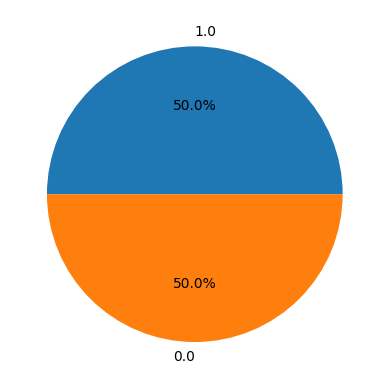

In [ ]:
 # using the matplotlib library to create a pie chart based on the class distribution of the "Engine Condition"  after balancing the classes

plt.pie(df_balanced['Engine Condition'].value_counts(),labels=df_balanced['Engine Condition'].value_counts().index,autopct='%1.1f%%');

The pie chart represents the distribution of the "Engine Condition" target variable. It shows that both classes, "1" and "0", are evenly distributed, each accounting for 50% of the dataset.

In [ ]:
# retrieve the dimensions of a DataFrame "df_balanced"

df_balanced.shape

(24634, 13)

 It represents the shape (24634, 13) suggests that the dataset "df_balanced" contains 24,634 rows  and 13 columns

In [ ]:
# To view the first 5 records of DataFrame "df_balanced"
df_balanced.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0       700.0          2.493592      11.790927          3.178981   
1       876.0          2.941606      11.987104          2.464504   
2       520.0          2.961746       6.553147          1.064347   
3       473.0          3.707835      11.987104          3.727455   
4       619.0          5.672919      11.987104          2.052251   

   lub oil temp  Coolant temp  Engine Load  Engine Stress  Engine Temperature  \
0     81.590241     81.632187   179.194528     238.094840           82.888175   
1     77.640934     82.445724   224.519269     298.378490           80.043329   
2     77.752266     79.645777   133.119160     176.504964           78.699021   
3     74.129907     71.774629   124.981460     165.406002           72.952268   
4     78.396989     87.000225   161.521177     213.470597           82.698607   

   Engine Wear  Engine Pressure  Engine Efficiency  Engine Condition  
0    -0.685389        20.581232         280.719560               1.0  
1     0.477102        40.755618         297.796517               0.0  
2     1.897399        10.092552         175.572137               1.0  
3    -0.019621        34.217053         127.567713               1.0  
4     3.620667        40.755618         109.114910               0.0

## **Standardising Data**

Standardization data is used to transform numerical data into a standardized scale. Data standardization  bring all features onto the same scale, which can be beneficial for  machine learning algorithms

In [ ]:
# Importing StandardScaler from scikit-learn preprocessing module.

from sklearn.preprocessing import StandardScaler

used for standardizing features by removing the mean and scaling to unit variance.

In [ ]:
# Create an instance of StandardScaler

std_scale=StandardScaler()
std_scale

StandardScaler()

In [ ]:
# Defining column names to be scaled

column_names= ["Engine rpm",	"Lub oil pressure",	"Fuel pressure",	"Coolant pressure",	"lub oil temp",	"Coolant temp",
       'Engine Load',	'Engine Stress',	'Engine Temperature',	'Engine Wear',	'Engine Pressure',	'Engine Efficiency']

# Fit and transform the data by loop to iterate over each column name

for col in column_names:
    df_balanced[[col]] = std_scale.fit_transform(df_balanced[[col]])

In [ ]:
# # To view the first 5 records of DataFrame "df_balanced" after scaling

df_balanced.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.416749         -0.784645       2.280840          0.963168   
1    0.257636         -0.343671       2.364582          0.176577   
2   -1.106460         -0.323848       0.044984         -1.364901   
3   -1.286552          0.410517       2.364582          1.567001   
4   -0.727119          2.344722       2.364582         -0.277285   

   lub oil temp  Coolant temp  Engine Load  Engine Stress  Engine Temperature  \
0      1.977527      0.519612    -0.402690      -0.399685            1.391325   
1      0.155351      0.655730     0.291672       0.292980            0.563929   
2      0.206718      0.187254    -1.108552      -1.107358            0.172951   
3     -1.464607     -1.129715    -1.233219      -1.234886           -1.498436   
4      0.504188      1.417771    -0.673441      -0.682620            1.336191   

   Engine Wear  Engine Pressure  Engine Efficiency  Engine Condition  
0    -1.176202         0.361172           0.127432               1.0  
1    -0.347736         2.436433           0.276733               0.0  
2     0.664458        -0.717757          -0.791851               1.0  
3    -0.701733         1.763836          -1.211545               1.0  
4     1.892569         2.436433          -1.372874               0.0

After standardizing the data, it becomes suitable for analysis as all features are transformed to the uniform scale. This ensures that no individual feature dominates the learning process due to its larger scale, thereby preventing bias in the model.






## **Model Building**

By building a machine learning model, historical data is utilized to train an algorithm that predicts the condition of an engine for unseen data.

Before model building splitting the DataFrame into  input features and target variable

In [ ]:
# x is used as the input features

x=df_balanced.drop(['Engine Condition'],axis=1)

# y as the target variable for a predictive model.

y=df_balanced[['Engine Condition']]

x represent the input features for the predictive model and y contain the target variable, specifically the "Engine Condition" column.


In [ ]:
# To see the first five rows of x

x.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.416749         -0.784645       2.280840          0.963168   
1    0.257636         -0.343671       2.364582          0.176577   
2   -1.106460         -0.323848       0.044984         -1.364901   
3   -1.286552          0.410517       2.364582          1.567001   
4   -0.727119          2.344722       2.364582         -0.277285   

   lub oil temp  Coolant temp  Engine Load  Engine Stress  Engine Temperature  \
0      1.977527      0.519612    -0.402690      -0.399685            1.391325   
1      0.155351      0.655730     0.291672       0.292980            0.563929   
2      0.206718      0.187254    -1.108552      -1.107358            0.172951   
3     -1.464607     -1.129715    -1.233219      -1.234886           -1.498436   
4      0.504188      1.417771    -0.673441      -0.682620            1.336191   

   Engine Wear  Engine Pressure  Engine Efficiency  
0    -1.176202         0.361172           0.127432  
1    -0.347736         2.436433           0.276733  
2     0.664458        -0.717757          -0.791851  
3    -0.701733         1.763836          -1.211545  
4     1.892569         2.436433          -1.372874

In [ ]:
#  To see the first five rows of y

y.head()

Engine Condition
0               1.0
1               0.0
2               1.0
3               1.0
4               0.0

## Splitting data into training and test set

Splitting data into two seperate subsets one for training the machine learning model and the other for evaluating its performance.

In [ ]:
# Import train and test split  from scikit-learn model selection module

from sklearn.model_selection import train_test_split


In [ ]:
#  To split a dataset into training and testing subsets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


After splitting the data into training and test subsets, it is essential to determine the dimensions of both the training and test data

In [ ]:
# To display the shapes of x_train and y_train
print(x_train.shape)
print(y_train.shape)

(17243, 12)
(17243, 1)


 It appears that  input features in train data has 17243 samples and 12 columns,

 while  target variable in the train data has 17243 samples and 1 column.

In [ ]:
print(x_test.shape)
print(y_test.shape)

(7391, 12)
(7391, 1)


 It appears that input features in test data has 7391 samples and 12 columns,

 while  target variable in the test data has 7391 samples and 1 column.

In this project, we aim to develop a predictive model for **"Automobile Engine Health Prediction"** by using various machine learning algorithms are,

   ☘  Logistic Regression

   ☘ Decision Tree Classifier

   ☘  Random Forest Classifier

   ☘  K-NN Classifier

   ☘  Support Vector Machine Classifier (SVMC)

   ☘ XGBoost

These Classification models are used when the goal is to predict the categorical or discrete class or category of a target variable based on input features.

We observed that the correlation between the target variable and independent variable is weak, indicating that the independent variables have minimal impact on the target variable. Therefore, we will proceed to build the model using two different approaches:

   ☘ Approach 1 : Model with class balance and standardization of data

   ☘ Approach 2 : Model with raw data using a pipeline (A pipeline will be created to streamline the modeling process).

To assess the data quality, we will examine the above-mentioned approaches.



## **Approach 1 : Model with class balance and standardization of data**

## **Logistic Regression**

Logistic Regression is a widely used statistical modeling technique for binary classification problems, where the goal is to predict the probability of an instance belonging to a particular class. Despite its name, logistic regression is primarily used for classification rather than regression tasks.

In [ ]:
# import the LogisticRegression class from the sklearn.linear_model module.

from sklearn.linear_model import LogisticRegression


In [ ]:
# create an instance of the LogisticRegression class and assigns it to the variable

logistic_model=LogisticRegression(verbose=True)


In [ ]:
# Fit the Logistic Regression model

logistic_model.fit(x_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=True)

In [ ]:
# Predict on training and test data

y_train_predicted = logistic_model.predict(x_train)
y_test_predicted = logistic_model.predict(x_test)


In [ ]:
# Accuracy - Training Data

logistic_model.score(x_train,y_train)

0.6451893522008931

 The accuracy score returned is approximately 0.6420, which means that the logistic model predicts the correct class for about 64.70% of the samples in the training data.

In [ ]:
# Accuracy - Test data

logistic_model.score(x_test,y_test)

0.6467325125152212

The accuracy score returned is approximately 0.6424, which means that the logistic model predicts the correct class for about 64.24
% of the samples in the test data.

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.64      8631
         1.0       0.64      0.67      0.65      8612

    accuracy                           0.65     17243
   macro avg       0.65      0.65      0.64     17243
weighted avg       0.65      0.65      0.64     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.66      0.62      0.63      3686
         1.0       0.64      0.68      0.66      3705

    accuracy                           0.65      7391
   macro avg       0.65      0.65      0.65      7391
weighted avg       0.65      0.65      0.65      7391



## **Decision Tree Classifier**

The Decision Tree classifier is a widely used machine learning algorithm for both classification and regression tasks. It creates a tree-like model of decisions and their possible consequences based on the features of the input data.

Each internal node of the tree represents a feature, each branch represents a decision rule, and each leaf node represents a class label or a predicted value.

In [ ]:
# imports the DecisionTreeClassifier class from the sklearn.tree module.

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Initialise a Decision Tree Classifier and assign it to variable

dt_model= DecisionTreeClassifier(max_depth=3)

In [ ]:
# Fit the model DecisionTreeClassifier model

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Predict on training and test data


ytrain_predict=dt_model.predict(x_train)
ytest_predict=dt_model.predict(x_test)

In [ ]:
# Accuracy - Training Data

dt_model.score(x_train,y_train)

0.6374180827002262

The returned value of 0.6416516847416343 indicates that the model achieved an accuracy of approximately 64.17% on the training data.

In [ ]:
# Accuracy - Test data

dt_model.score(x_test,y_test)

0.6309024489243674

 The returned value of 0.6348261398998782 indicates that the model achieved an accuracy of approximately 63.48% on the test data.

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68      8631
         1.0       0.69      0.49      0.57      8612

    accuracy                           0.64     17243
   macro avg       0.65      0.64      0.63     17243
weighted avg       0.65      0.64      0.63     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.77      0.68      3686
         1.0       0.68      0.49      0.57      3705

    accuracy                           0.63      7391
   macro avg       0.64      0.63      0.62      7391
weighted avg       0.64      0.63      0.62      7391



## **Random Forest Classifier**

The Random Forest classifier is a popular ensemble learning method used for classification tasks in machine learning. It is based on the concept of decision trees and combines multiple trees to make predictions. Random Forest is known for its robustness, accuracy, and ability to handle high-dimensional datasets.

In [ ]:
#  imports the RandomForestClassifier class from the sklearn.

from sklearn.ensemble import RandomForestClassifier


In [ ]:
# create an instance of the RandomForestClassifier class and assigns it to the variable

Rf_model= RandomForestClassifier(max_depth=3)

In [ ]:
# Fit the RandomForestClassifier model

Rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
# Predict on training and test data


ytrain_predict=Rf_model.predict(x_train)
ytest_predict=Rf_model.predict(x_test)

In [ ]:
# Accuracy - Training Data

Rf_model.score(x_train,y_train)

0.650060894275938

The returned value of 0.6446094067157687 indicates that the model achieved an accuracy of approximately 64.46% on the training data.

In [ ]:
# Accuracy - Test data

Rf_model.score(x_test,y_test)

0.6474090109592748

The returned value of 0.6419970234068462 indicates that the model achieved an accuracy of approximately 64.20% on the test data.

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68      8631
         1.0       0.68      0.56      0.62      8612

    accuracy                           0.65     17243
   macro avg       0.65      0.65      0.65     17243
weighted avg       0.65      0.65      0.65     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67      3686
         1.0       0.68      0.56      0.62      3705

    accuracy                           0.65      7391
   macro avg       0.65      0.65      0.64      7391
weighted avg       0.65      0.65      0.64      7391



## **K-Nearest Neighbor Classifier**

The K-Nearest Neighbor (KNN) classifier is a popular machine learning algorithm used for both classification and regression tasks. In this response, we will focus on KNN as a classifier.

The basic idea behind KNN is to classify a new data point based on the class labels of its neighboring data points. KNN assumes that similar instances belong to the same class. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution

In [ ]:
#  import the KNeighborsClassifier class from the sklearn.neighbors module.

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# creates an instance of the KNeighborsClassifier class and assigns it to the variable

knn_model = KNeighborsClassifier(n_neighbors=85,p=2,metric="euclidean")

In [ ]:
# Fit the KNeighborsClassifier model

knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=85)

In [ ]:
# Predict on training and test data


ytrain_predict=knn_model.predict(x_train)
ytest_predict=knn_model.predict(x_test)

In [ ]:
# Accuracy - Training Data

knn_model.score(x_train,y_train)

0.66270370585165

The accuracy score returned is approximately 0.6631, which means that the k-nearest neighbors model predicts the correct class for about 66.31% of the samples in the training data.

In [ ]:
# Accuracy - Test data

knn_model.score(x_test,y_test)

0.6602624813962927

The accuracy score returned is approximately 0.6512, which means that the k-nearest neighbors model predicts the correct class for about 65.12% of the samples in the test data.

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68      8631
         1.0       0.69      0.59      0.64      8612

    accuracy                           0.66     17243
   macro avg       0.67      0.66      0.66     17243
weighted avg       0.67      0.66      0.66     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68      3686
         1.0       0.68      0.60      0.64      3705

    accuracy                           0.66      7391
   macro avg       0.66      0.66      0.66      7391
weighted avg       0.66      0.66      0.66      7391



## **Support Vector Machine**

Support Vector Machine (SVM) is a popular machine learning algorithm used for both classification and regression tasks. However, in this response, we will focus on SVM as a classifier.

The main idea behind SVM is to find an optimal hyperplane that separates data points belonging to different classes in a high-dimensional feature space.

It aims to maximize the margin between the decision boundary and the closest points of each class, known as support vectors. SVM is a binary classifier, meaning it classifies instances into two classes, but it can be extended to handle multi-class classification as well.

In [ ]:
# To  imports the svm module from the sklearn library

from sklearn import svm

In [ ]:
#  creates an instance of the SVC class from the svm module and assigns it to the variable

svc_model = svm.SVC(kernel='linear')

In [ ]:
# Fit the  SVC  model

svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# Predict on training and test data


ytrain_predict=svc_model.predict(x_train)
ytest_predict=svc_model.predict(x_test)

In [ ]:
# Accuracy - Training Data

svc_model.score(x_train,y_train)

0.6415356956446094

The accuracy score returned is approximately 0.63997, which means that the support vector machine model predicts the correct class for about 63.997% of the samples in the training data.

In [ ]:
# Accuracy - Test data

svc_model.score(x_test,y_test)

0.6417264240292248

The accuracy score returned is approximately 0.63983, which means that the support vector machine model predicts the correct class for about 63.983% of the samples in the test data.

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      8631
         1.0       0.63      0.69      0.66      8612

    accuracy                           0.64     17243
   macro avg       0.64      0.64      0.64     17243
weighted avg       0.64      0.64      0.64     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      3686
         1.0       0.63      0.69      0.66      3705

    accuracy                           0.64      7391
   macro avg       0.64      0.64      0.64      7391
weighted avg       0.64      0.64      0.64      7391



## **Extreme Gradient Boosting**

 It is widely used for regression and classification problems and has gained popularity for its performance and effectiveness in various machine learning competitions.

 The XGBoost algorithm is an enhanced version of gradient boosting, which sequentially combines multiple weak prediction models (typically decision trees) to create a powerful ensemble model. The key idea behind XGBoost is to optimize the overall ensemble by minimizing a specific loss function while adding new models to the ensemble.

In [ ]:
# imports the xgboost module and assigns it the name "xgb".

import xgboost as xgb

In [ ]:
# Create an XGBoost classifier object and assigns  it to variable

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)


In [ ]:
#  Fits  the XGBoost model on the training data

xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Accuracy - Training Data

xgb_model.score(x_train,y_train)

0.8584933016296468

The returned value of 0.8625529200255176 indicates that the model achieved an accuracy of approximately 86.26% on the training data.

In [ ]:
# Accuracy - Test data

xgb_model.score(x_test,y_test)

0.6613448789067785

The returned value of 0.658232986064132 indicates that the model achieved an accuracy of approximately 65.82% on the test data.

In [ ]:
# Predict on training and test data

ytrain_predict=xgb_model.predict(x_train)

ytest_pred = xgb_model.predict(x_test)

In [ ]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      8631
         1.0       0.88      0.83      0.85      8612

    accuracy                           0.86     17243
   macro avg       0.86      0.86      0.86     17243
weighted avg       0.86      0.86      0.86     17243



In [ ]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      3686
         1.0       0.63      0.69      0.66      3705

    accuracy                           0.64      7391
   macro avg       0.64      0.64      0.64      7391
weighted avg       0.64      0.64      0.64      7391



## **Approach 2 : Model with raw data using a pipeline**

In machine learning, a pipeline refers to a sequence of data processing components or steps that are chained together in a specific order to form a cohesive workflow. It helps streamline and automate the process of building and deploying machine learning models by encapsulating multiple steps into a single entity.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# X is used as the input features

X=df.drop(['Engine Condition'],axis=1)

# Y as the target variable for a predictive model.

Y=df[['Engine Condition']]

#  To split a dataset into training and testing subsets

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)


# Define the parameter grids for each algorithm
param_grid_lr = {'classifier__C': [0.1, 1, 10]}
param_grid_dt = {'classifier__max_depth': [3]}
param_grid_rf = {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [3]}
param_grid_knn = {'classifier__n_neighbors': [3, 5, 7], 'classifier__metric': ['euclidean', 'manhattan']}
param_grid_svm = {'classifier__C': [0.1, 1, 10]}
param_grid_xgb = {'classifier__max_depth': [3, 5, 7]}

# Define the pipeline steps for each algorithm
pipe_lr = Pipeline([('classifier', LogisticRegression())])
pipe_dt = Pipeline([('classifier', DecisionTreeClassifier())])
pipe_rf = Pipeline([('classifier', RandomForestClassifier())])
pipe_knn = Pipeline([('classifier', KNeighborsClassifier())])
pipe_svm = Pipeline([('classifier', SVC())])
pipe_xgb = Pipeline([('classifier', XGBClassifier())])

# Create a list of pipelines and parameter grids
pipelines = [pipe_lr, pipe_dt, pipe_rf, pipe_knn, pipe_svm, pipe_xgb]
param_grids = [param_grid_lr, param_grid_dt, param_grid_rf, param_grid_knn, param_grid_svm, param_grid_xgb]
algorithm_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'Support Vector Machine', 'XGBoost']

# Train and evaluate each pipeline with hyperparameter tuning
for pipeline, param_grid, algorithm_name in zip(pipelines, param_grids, algorithm_names):
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best model and predict on train/test data
    best_model = grid_search.best_estimator_
    Ytrain_pred = best_model.predict(X_train)
    Ytest_pred = best_model.predict(X_test)

    # Generate classification reports
    train_report = classification_report(Y_train, Ytrain_pred)
    test_report = classification_report(Y_test, Ytest_pred)

    # Print the results
    print(f"Classification Report for {algorithm_name} - Train Data:\n{train_report}\n")
    print(f"Classification Report for {algorithm_name} - Test Data:\n{test_report}\n")
    print(f"Best Parameters for {algorithm_name}:\n{grid_search.best_params_}\n")


Classification Report for Logistic Regression - Train Data:
              precision    recall  f1-score   support

           0       0.58      0.31      0.40      5035
           1       0.68      0.87      0.76      8639

    accuracy                           0.66     13674
   macro avg       0.63      0.59      0.58     13674
weighted avg       0.64      0.66      0.63     13674


Classification Report for Logistic Regression - Test Data:
              precision    recall  f1-score   support

           0       0.56      0.29      0.38      2183
           1       0.67      0.87      0.76      3678

    accuracy                           0.65      5861
   macro avg       0.62      0.58      0.57      5861
weighted avg       0.63      0.65      0.62      5861


Best Parameters for Logistic Regression:
{'classifier__C': 1}

Classification Report for Decision Tree - Train Data:
              precision    recall  f1-score   support

           0       0.64      0.21      0.31      5035

In [ ]:
from tabulate import tabulate

# Data for class balance and standardization model
class_balance_standardization_data = [
    ["Logistic Regression", 64.7, 64.20],
    ["Random Forest Classifier", 65.72, 65.54],
    ["Decision Tree Classifier", 64.86, 63.77],
    ["K-NN", 66.31, 66.12],
    ["SVM", 64.59, 64.0],
    ["XgBoost", 85.99, 64.0]
]

# Data for raw data using a pipeline model
raw_data_pipeline_data = [
    ["Logistic Regression", 66.65, 65.50],
    ["Random Forest Classifier", 67.54, 66.44],
    ["Decision Tree Classifier", 67.69, 65.77],
    ["K-NN", 72.64, 61.26],
    ["SVM", 65.32, 65.19],
    ["XgBoost", 72.68, 66.10]
]

# Creating the table
headers = ["Model", "Train Data Accuracy", "Test Data Accuracy"]
table_class_balance_standardization = tabulate(class_balance_standardization_data, headers, tablefmt="grid")
table_raw_data_pipeline = tabulate(raw_data_pipeline_data, headers, tablefmt="grid")

# Printing the tables
print("Model with class balance and standardization:")
print(table_class_balance_standardization)

print("\nModel with raw data using a pipeline:")
print(table_raw_data_pipeline)


Model with class balance and standardization:
+--------------------------+-----------------------+----------------------+
| Model                    |   Train Data Accuracy |   Test Data Accuracy |
+==========================+=======================+======================+
| Logistic Regression      |                 64.7  |                64.2  |
+--------------------------+-----------------------+----------------------+
| Random Forest Classifier |                 65.72 |                65.54 |
+--------------------------+-----------------------+----------------------+
| Decision Tree Classifier |                 64.86 |                63.77 |
+--------------------------+-----------------------+----------------------+
| K-NN                     |                 66.31 |                66.12 |
+--------------------------+-----------------------+----------------------+
| SVM                      |                 64.59 |                64    |
+--------------------------+--------------

## **Conclusion**

The results obtained from our machine learning models indicate

☘  Logistic Regression, Random Forest Classifier, and Decision Tree Classifier demonstrate better performance when using raw data with a pipeline, as opposed to class balance and standardized data.

☘  K-NN performs better with class balance and standardized data.

☘ SVM demonstrates comparable performance in terms of accuracy between the two approaches. However, the model with raw data using a pipeline shows improved accuracy compared to the model with standardized balanced data.

☘ XGBoost achieves high accuracy on the train data with class balance and standardized data but performs better overall with raw data using a pipeline.

Overall, the accuracy of the models is good, but there is still room for improvement. One way to improve the accuracy of the models would be to collect more data with more different set of features  may be able to make better predictions.

In terms of a business perspective, the accuracy of the models is important because it determines how well the models can be used to make decisions. If the models are not accurate, then they may not be able to make good decisions. This could lead to lost profits or other negative consequences.